In [61]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

from scipy import stats
from scipy.stats import vonmises, vonmises_line

In [21]:
# Von MIsses

vonmises.mean(1,loc=1)

1.0000000000000002

In [24]:
kappa = 3.99
mean, var, skew, kurt = vonmises.stats(kappa, moments='mvsk')

In [29]:
vals = vonmises.ppf([0.001, 0.5, 0.999], kappa)
np.allclose([0.001, 0.5, 0.999], vonmises.cdf(vals, kappa))

True

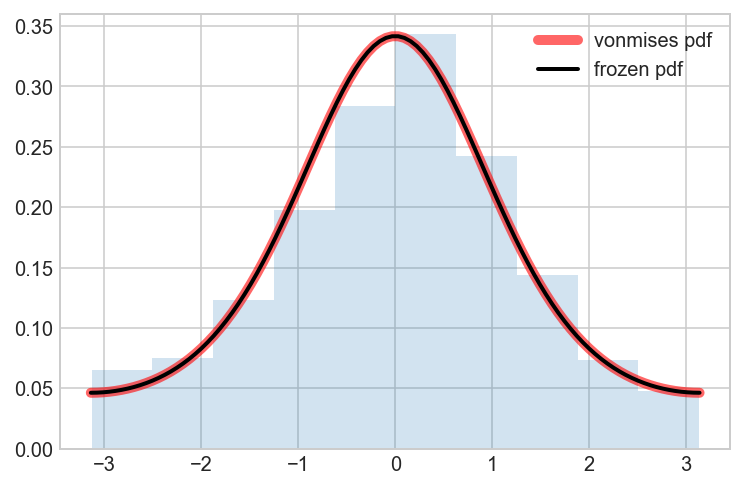

In [67]:
fig, ax = plt.subplots(1, 1)

kappa = 1

x = np.linspace(vonmises.ppf(0.0001, kappa),
                vonmises.ppf(0.9999, kappa), 100)
ax.plot(x, vonmises.pdf(x, kappa),
       'r-', lw=5, alpha=0.6, label='vonmises pdf')


rv = vonmises(kappa)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = vonmises.rvs(kappa, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

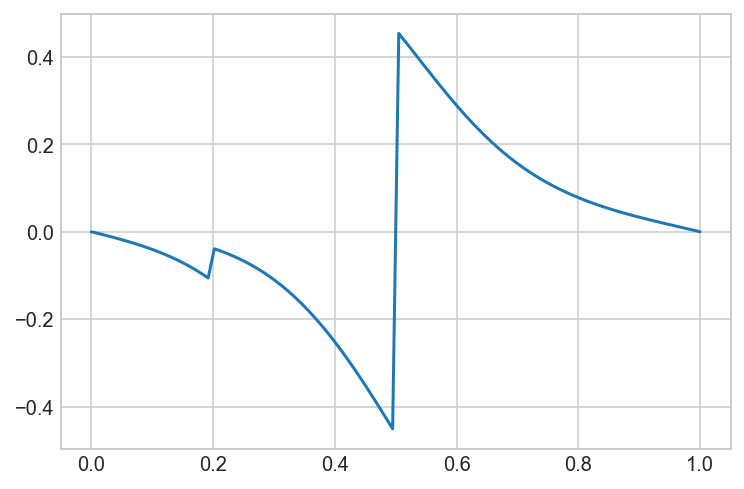

In [201]:
kappa = 1
a = 0.2
b = 0.5

pi = np.pi
rv = vonmises(kappa)

t = np.linspace(0,1,100)

fig, ax = plt.subplots(1, 1)

ax.plot(t,rv.cdf(2*pi*(t-a)%(2*pi))*(1-rv.cdf(2*pi*(t-b)%(2*pi))))

In [219]:
pdf.shape

(10000,)

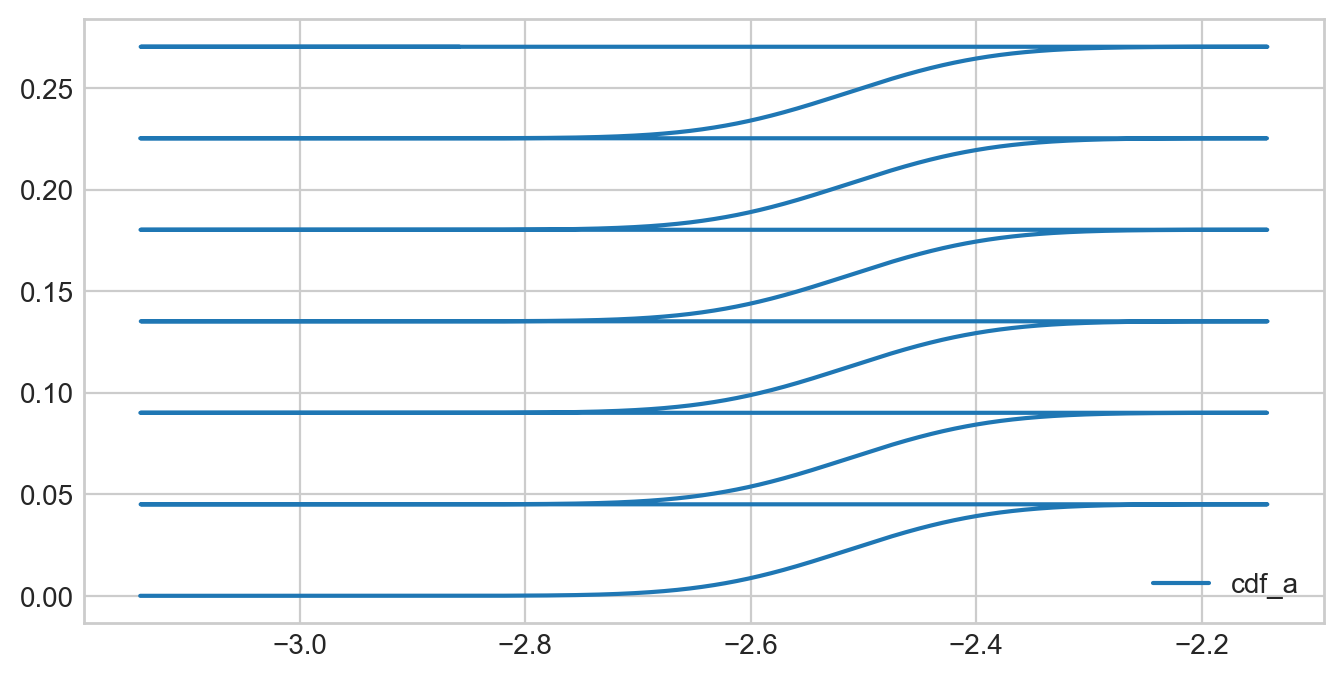

In [474]:
import scipy
import scipy.integrate as integrate
# fig, ax = plt.subplots(1, 1)
t = np.linspace(0,1,10000)

t0 = 0

t = -pi +2*pi*(t-t0)%1 

a = -0.8*pi

# a = 

b = 0.8*pi

kappa =100
def vonMisesPdf(x,mu,kappa):
    return np.exp(kappa*(np.cos(x-mu)))/(2*pi*scipy.special.i0(kappa))

pdf_a = vonMisesPdf(t,mu=a,kappa=kappa)
cdf_a = np.cumsum(pdf_a)*((t[-1]-t[0])/(len(t)-1))

pdf_b = vonMisesPdf(t,mu=b,kappa=kappa)
cdf_b = np.cumsum(pdf_b)*((t[-1]-t[0])/(len(t)-1))
ccdf_b = 1-np.cumsum(pdf_b)*((t[-1]-t[0])/(len(t)-1))


fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=100)
ax.plot(t,cdf_a,label="cdf_a")
# ax.plot(t,ccdf_b,label="ccdf_b")
# ax.plot(t,cdf_a*ccdf_b,label="cdf_a*ccdf_b")
plt.legend()

-3.140334758633401 -2.1463328397646144
-3.139129844340781 -2.1451279254719964


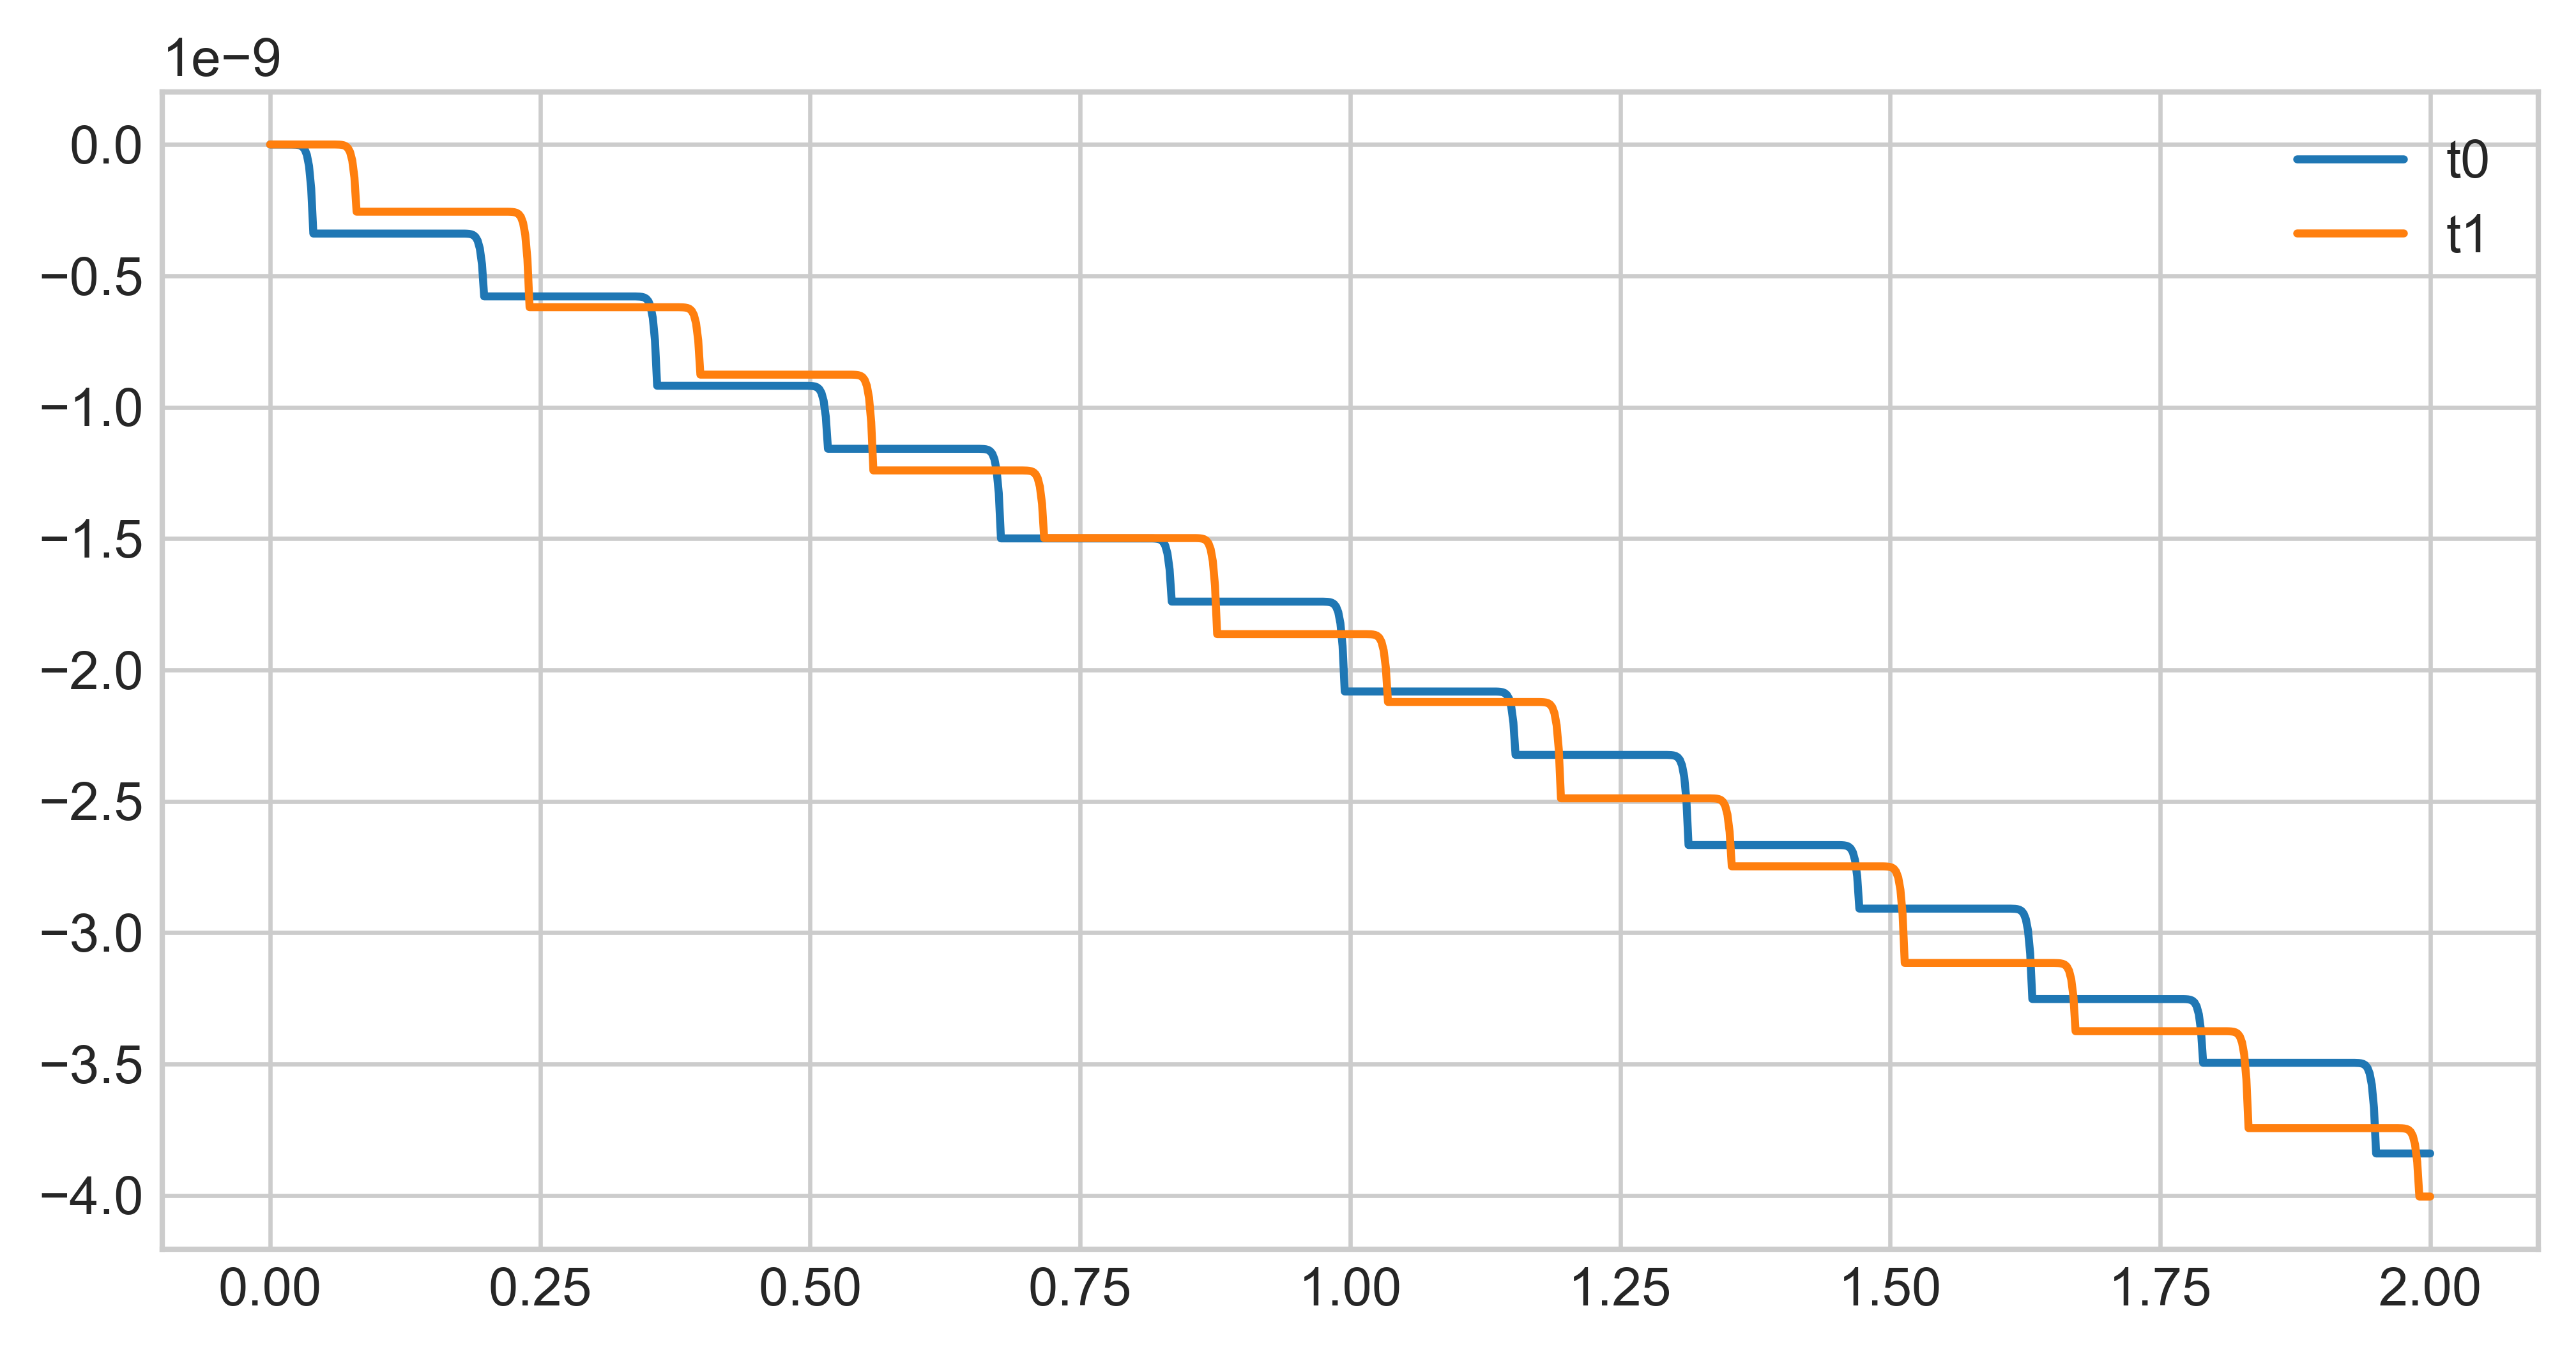

In [475]:
def vonMisesPdf(x,mu,kappa):
    return np.exp(kappa*(np.cos(x-mu)))/(2*pi*scipy.special.i0(kappa))

def phaseIndicator(t,t0,a,b,kappa):
        
#     t_ = (((t - t0)%(2*pi))-pi) # map [0,1]->[-pi,pi]
    t_ = -pi +2*pi*(t-t0)%1 
    print(np.min(t_),np.max(t_))
    pdf_a = vonMisesPdf(t_,mu=(a*2.-1.)*pi,kappa=kappa)
    cdf_a = np.cumsum(pdf_a)*((t_[-1]-t_[0])/(len(t_)-1))

    pdf_b = vonMisesPdf(t_,mu=(b*2.-1.)*pi,kappa=kappa)
#     cdf_b = np.cumsum(pdf_b)*((t_[-1]-t_[0])/(len(t_)-1))
    ccdf_b = 1-np.cumsum(pdf_b)*((t_[-1]-t_[0])/(len(t_)-1))
    
    return cdf_a*ccdf_b


t = np.linspace(0,2,1000)
a = 0.25
b = 0.75
kappa = 100
t0 = 0.2
t1 = 0.4

e_i0 = phaseIndicator(t,t0,a,b,kappa)
e_i1 = phaseIndicator(t,t1,a,b,kappa)

fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=300)

ax.plot(t,e_i0,label="t0")
ax.plot(t,e_i1,label="t1")

plt.legend(loc='best', frameon=False)

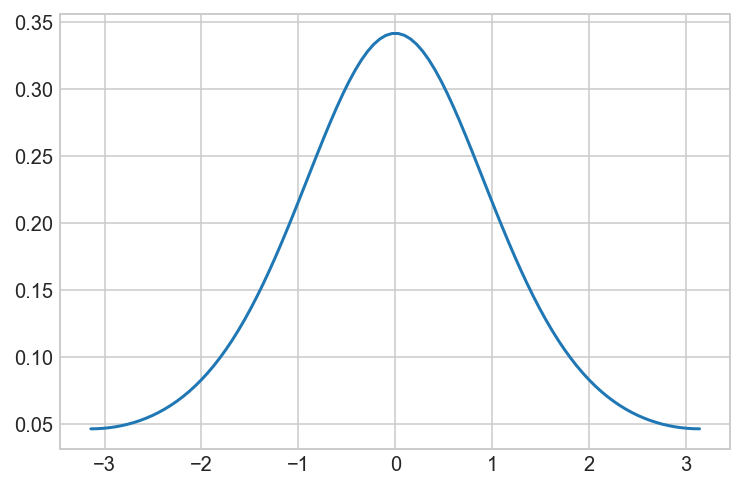

In [93]:
kappa = 1
t = np.linspace(-pi,pi,100)
y = vonmises.pdf(t,kappa)
plt.plot(t,y)

In [103]:
%timeit _=vonmises.cdf(t,kappa)

292 µs ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [104]:
from scipy.special import i0e

In [105]:
i0e

<ufunc 'i0e'>

In [82]:
%timeit _=i0(0)

1.27 µs ± 7.04 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [84]:
np.exp(kappa*np.cos(x))

120 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [106]:
from scipy.stats import norm

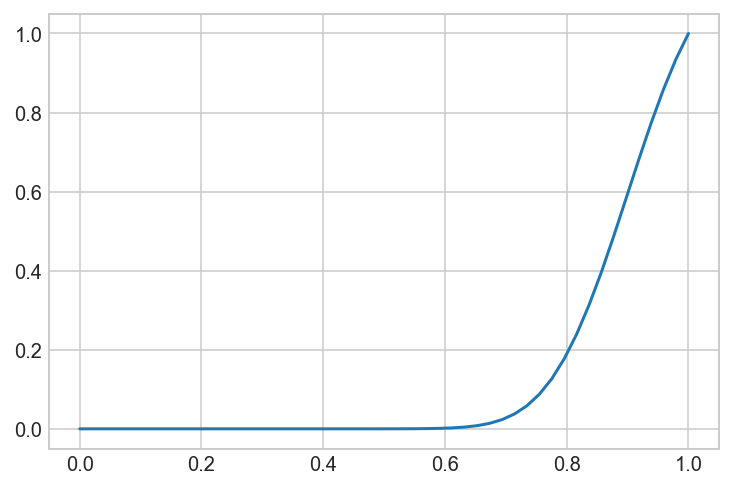

In [166]:
t = np.linspace(0, 1)
loc = 0.9
scale = 0.1
cdf_low = norm.cdf(0,loc=loc, scale=scale)
cdf_high = norm.cdf(1,loc=loc, scale=scale)
scale_correction = 1./(cdf_high - cdf_low)

# %timeit _=(norm.cdf(t, loc=loc, scale=scale)-cdf_low)*scale_correction
plt.plot(t, (norm.cdf(t, loc=loc, scale=scale)-cdf_low)*scale_correction)

In [361]:
import rvlib
import numba

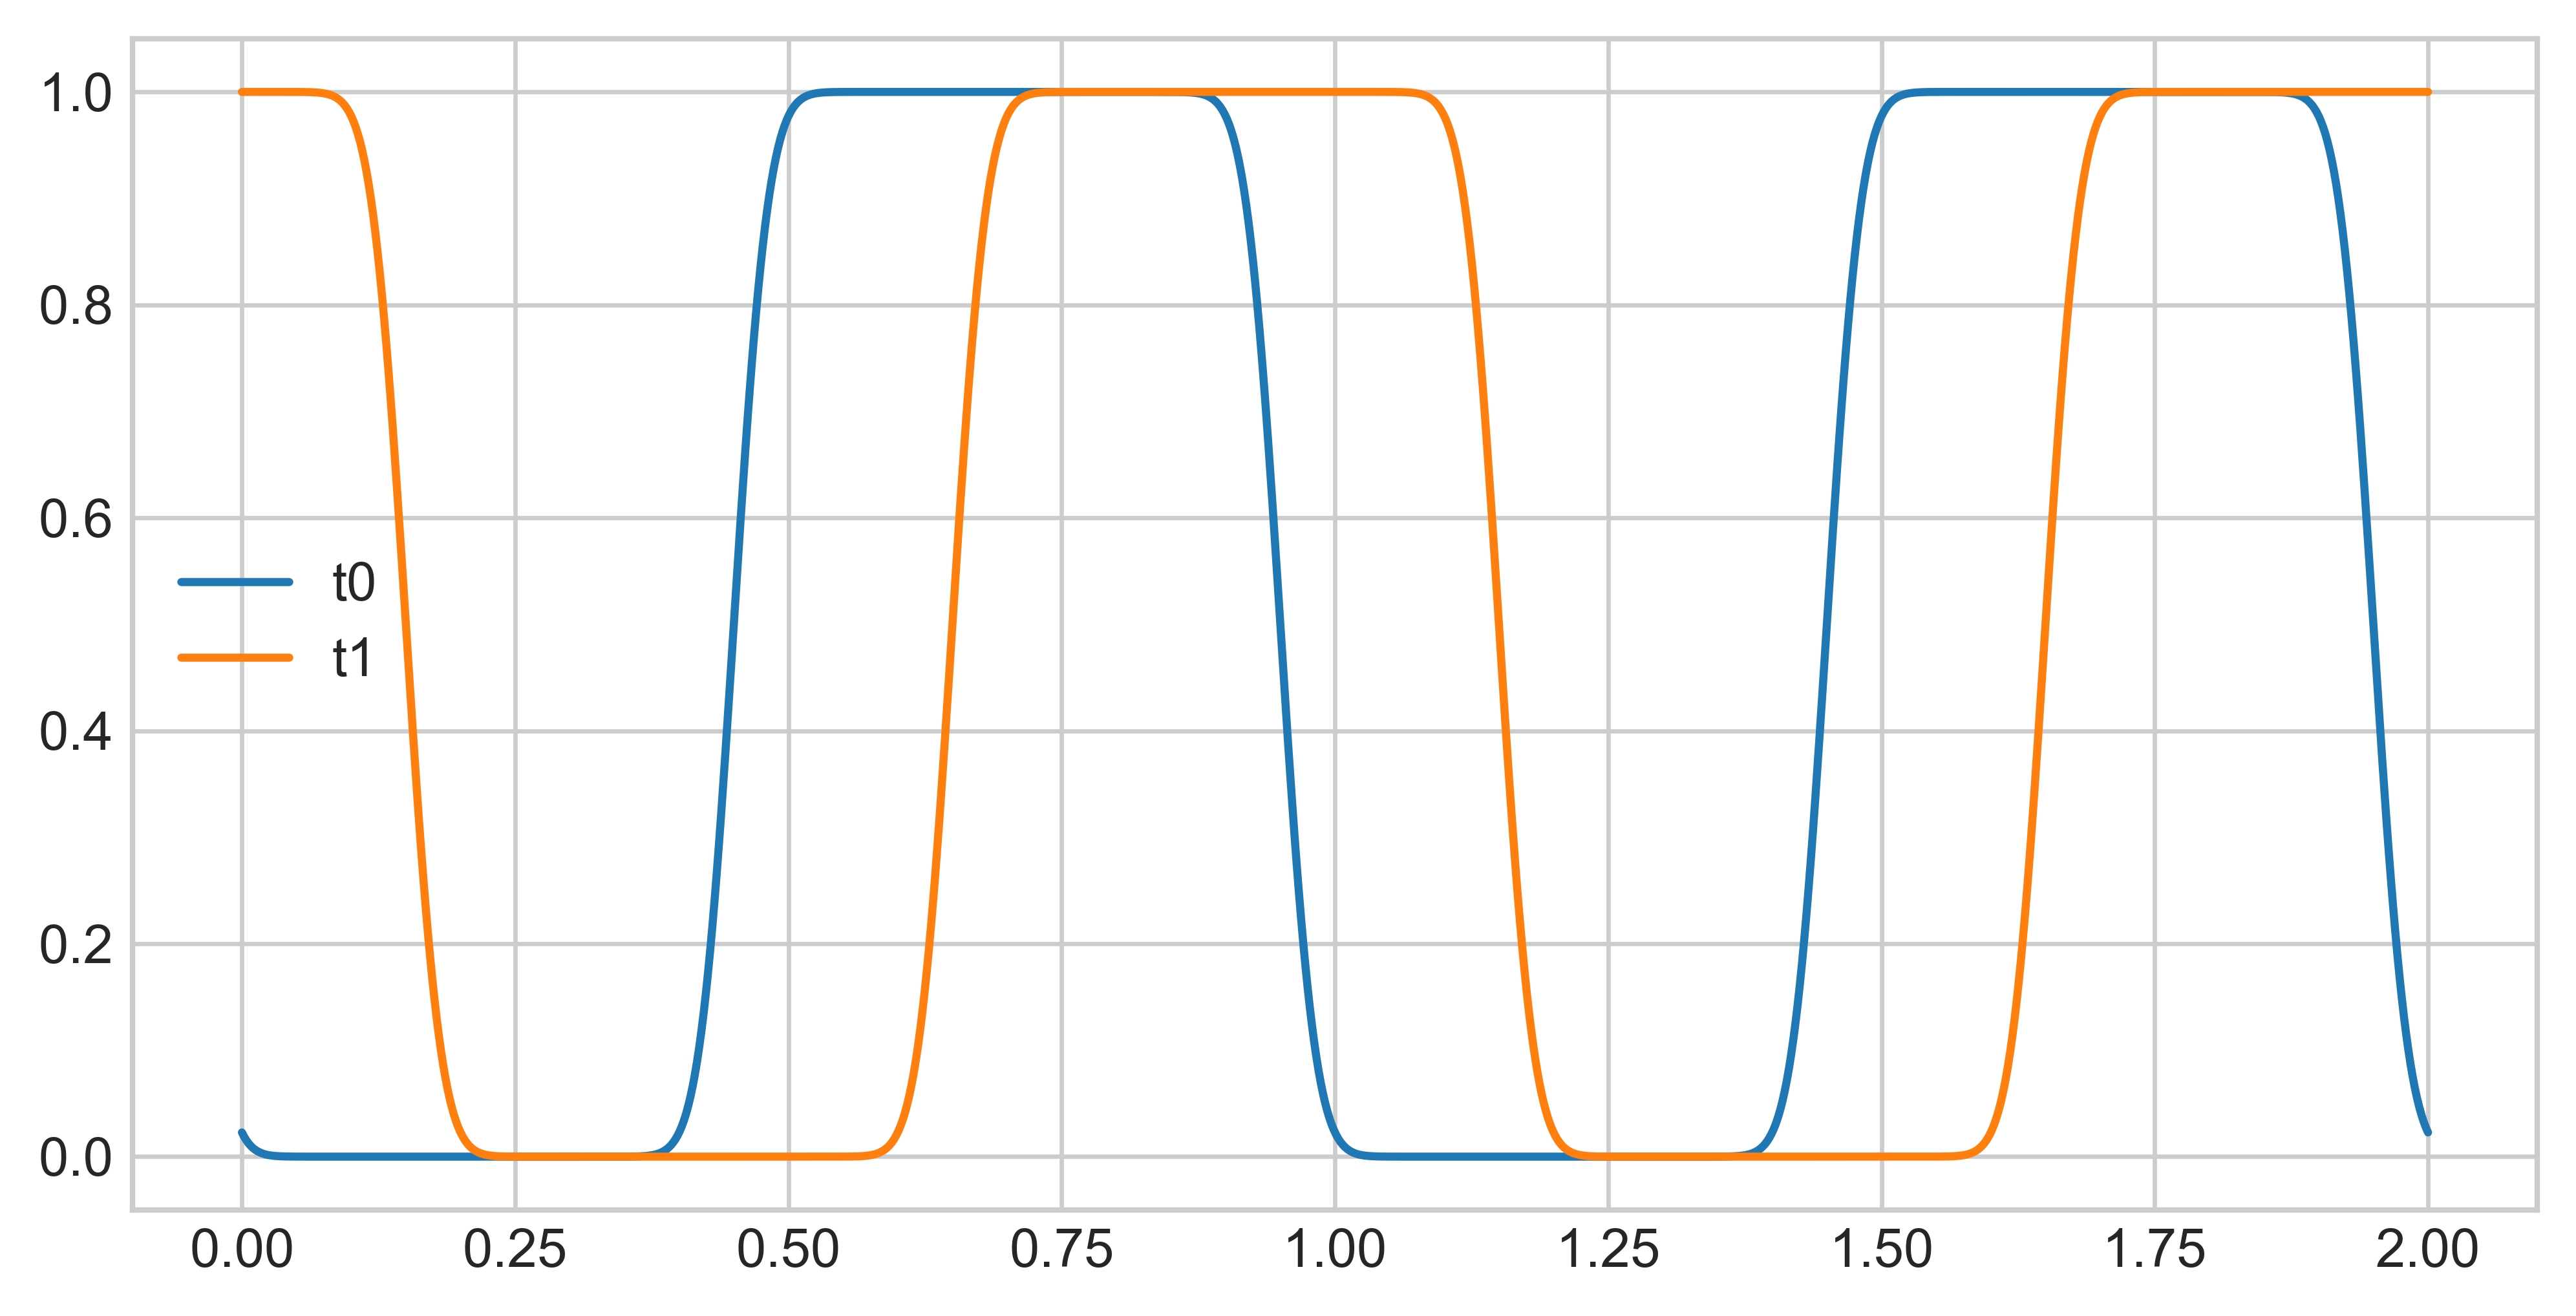

In [442]:
def phaseIndicator(t,t0,a,b,sigma):
    t_ = ((t - t0)%1)*2.-1. # map [0,1]->[-1,1]
    ndist_a = rvlib.Normal(mu=a*2.-1.,sigma=sigma)
#     cdf_a = ndist_a.cdf(t_)
    cdf_a = (ndist_a.cdf(t_)-ndist_a.cdf(-1))/(ndist_a.cdf(1)-ndist_a.cdf(-1))
    ndist_b = rvlib.Normal(mu=b*2.-1.,sigma=sigma)
    ccdf_b = 1- (ndist_b.cdf(t_)-ndist_b.cdf(-1))/(ndist_b.cdf(1)-ndist_b.cdf(-1))
#     ccdf_b = ndist_b.ccdf(t_)
    return cdf_a*ccdf_b


t = np.linspace(0,2,1000)
a = 0.25
b = 0.75
sigma = 0.05
t0 = 0.2
t1 = 0.4

e_i0 = phaseIndicator(t,t0,a,b,sigma)
e_i1 = phaseIndicator(t,t1,a,b,sigma)

fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=300)

ax.plot(t,e_i0,label="t0")
ax.plot(t,e_i1,label="t1")

plt.legend(loc='best', frameon=False)

In [423]:
@numba.njit(nogil=True,fastmath=True)
def logistic_cdf(x,mu,s):
    return 1/(1+np.exp(-(x-mu)/s))

@numba.njit(nogil=True,fastmath=True)
def phaseIndicator(t,t0,a,b,s):
    t_ = ((t - t0)%1)*2.-1. # map [0,1]->[-1,1]
    mu_a = a*2.-1.
    cdf_a = (logistic_cdf(t_,mu_a,s)- logistic_cdf(-1,mu_a,s))/(logistic_cdf(1,mu_a,s) - logistic_cdf(-1,mu_a,s))
    mu_b = b*2.-1.
    ccdf_b = 1-(logistic_cdf(t_,mu_b,s)- logistic_cdf(-1,mu_b,s))/(logistic_cdf(1,mu_b,s) - logistic_cdf(-1,mu_b,s))
    return cdf_a*ccdf_b

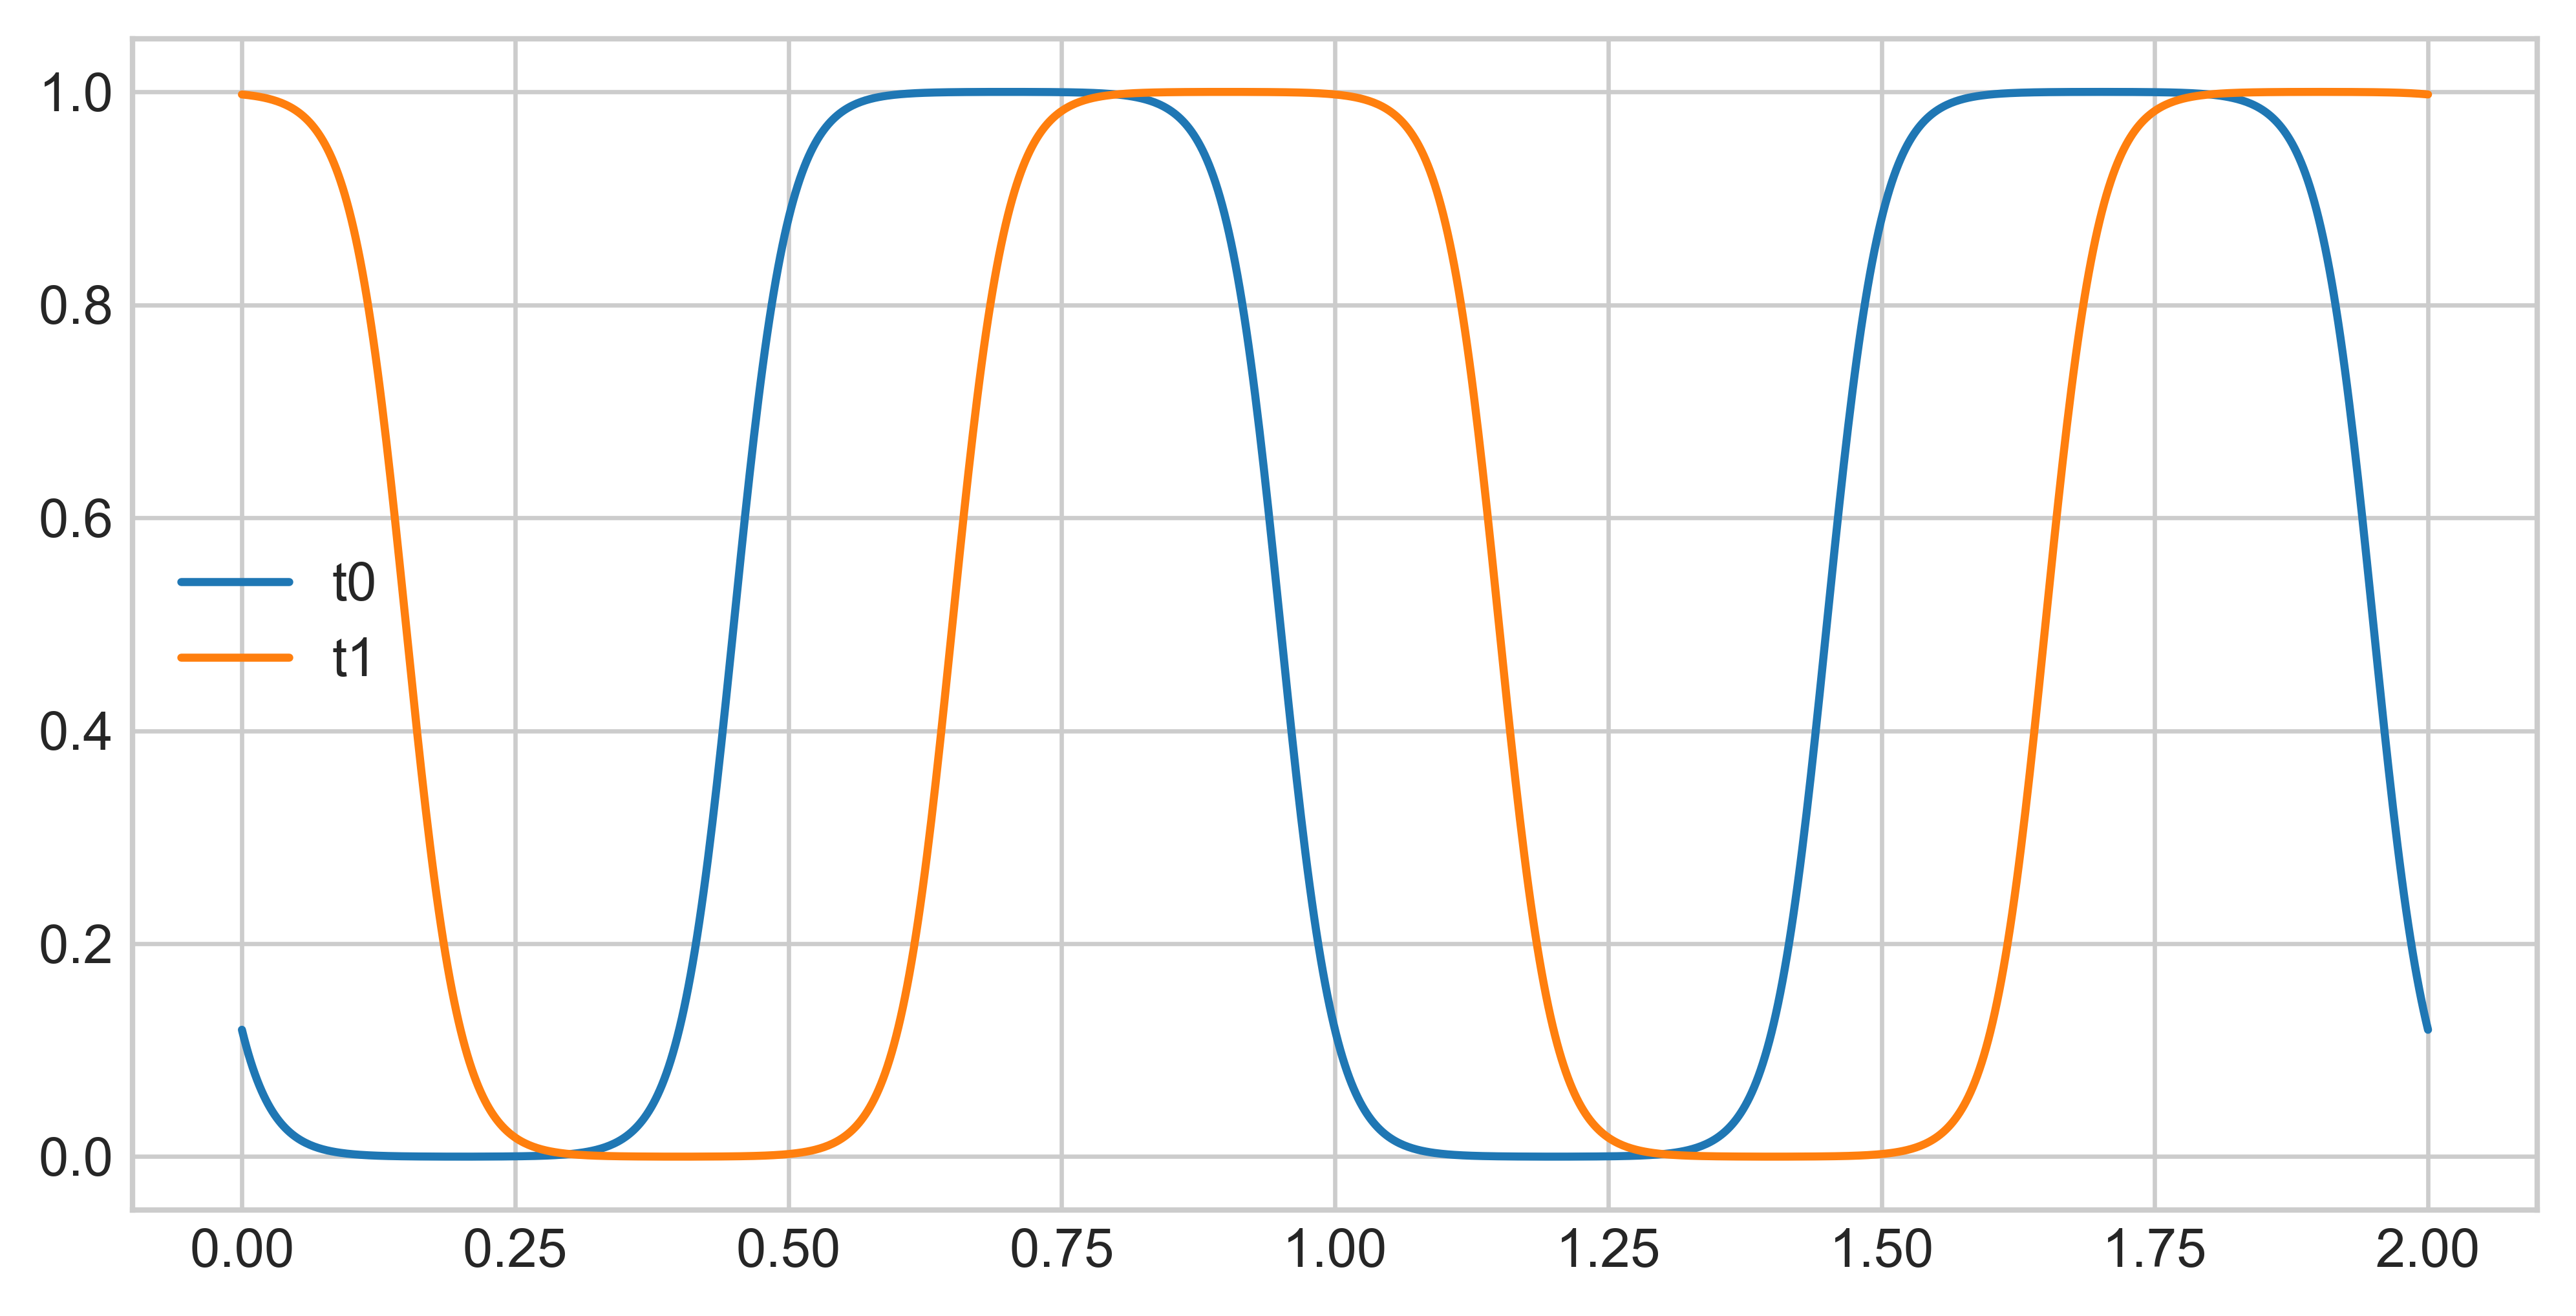

In [441]:
t = np.linspace(0,2,1000)
a = 0.25
b = 0.75
sigma = 0.05
t0 = 0.2
t1 = 0.4

e_i0 = phaseIndicator(t,t0,a,b,sigma)
e_i1 = phaseIndicator(t,t1,a,b,sigma)

fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=300)

ax.plot(t,e_i0,label="t0")
ax.plot(t,e_i1,label="t1")

plt.legend(loc='best', frameon=False)

In [426]:
%timeit e_i = phaseIndicator(t,t0,a,b,sigma)


3.47 µs ± 56.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


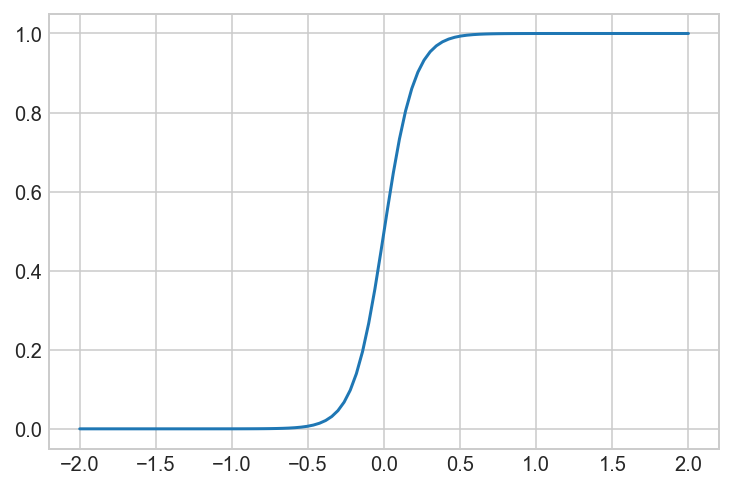

In [374]:
t = np.linspace(-2,2,100)

ndist = rvlib.Logistic(mu=0,theta =0.1)
cdf = ndist.cdf(t)

plt.plot(t,cdf)